## KNN (K Nearest Neighbor, KNN)
屬於監督式學習演算法，主要是找尋最鄰近的 K 個鄰居，透過多數決的概念決定屬於哪一類
- K 是參數，決定找幾個點
- 計算每個鄰居與自己之間的距離
- 多數決投票

K 會影響最後的結果

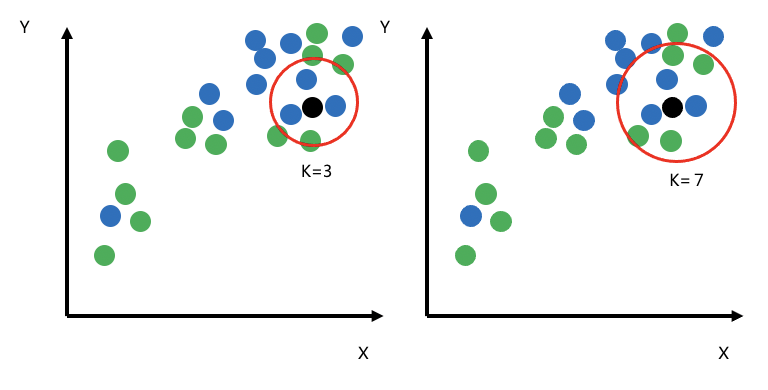

注意：通常會將數值進行正規化，讓計算出來的結果比較 robust

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()

In [2]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [25]:
from pandas_profiling import ProfileReport
profile = ProfileReport(iris_df, title="Iris Profiling Report")

In [26]:
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
from sklearn.model_selection import train_test_split
X = iris_df.drop(labels=['target_name', 'target'] ,axis=1)
y = iris_df['target'].values
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2 , random_state=55)

In [8]:
print(len(X_train))
print(len(X_test))

120
30


In [9]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
11,4.8,3.4,1.6,0.2
1,4.9,3.0,1.4,0.2
109,7.2,3.6,6.1,2.5
126,6.2,2.8,4.8,1.8
30,4.8,3.1,1.6,0.2
...,...,...,...,...
37,4.9,3.6,1.4,0.1
55,5.7,2.8,4.5,1.3
29,4.7,3.2,1.6,0.2
125,7.2,3.2,6.0,1.8


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train, y_train)
# 準確度評估
print('訓練集: ', knnModel.score(X_train, y_train))
print('測試集: ',knnModel.score(X_test, y_test))

訓練集:  0.9583333333333334
測試集:  0.9666666666666667


In [11]:
y_pred = knnModel.predict(X_test)

In [12]:
# 建立訓練集的 DataFrme
df_train = pd.DataFrame(X_train)
df_train['target'] = y_train
# 建立測試集的 DataFrme
df_test = pd.DataFrame(X_test)
df_test['target'] = y_test

In [13]:
iris_df.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target_name']

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


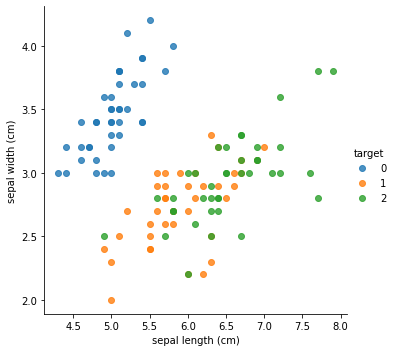

In [15]:
sns.lmplot("sepal length (cm)", "sepal width (cm)", hue='target', data=df_train, fit_reg=False)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


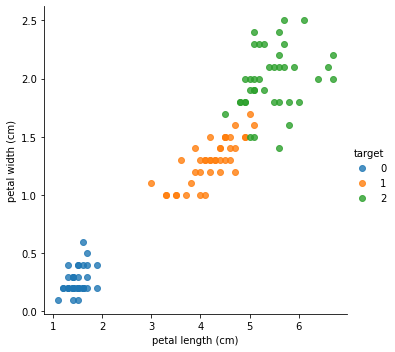

In [16]:
# 訓練集
sns.lmplot("petal length (cm)", "petal width (cm)", hue='target', data=df_train, fit_reg=False)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


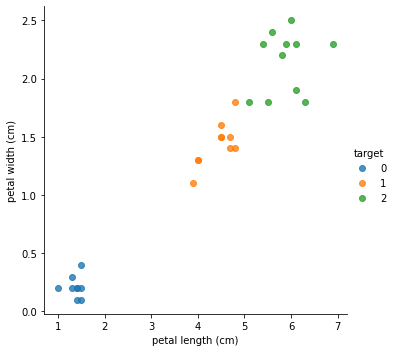

In [17]:
# 測試集
df_test['Predict'] = y_test
sns.lmplot("petal length (cm)", "petal width (cm)", hue='target', data=df_test, fit_reg=False)

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = iris_df.drop(labels=['target_name', 'target'] ,axis=1)
y = iris_df['target'].values
X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.2 , random_state=55)

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

<Figure size 432x288 with 0 Axes>

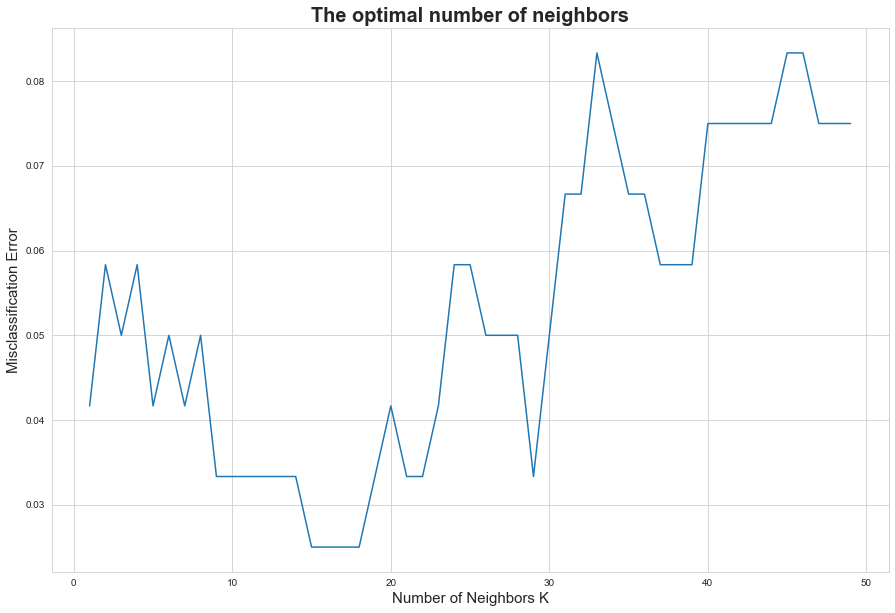

In [22]:
# creating list of K for KNN
k_list = list(range(1, 50, 1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

<Figure size 432x288 with 0 Axes>

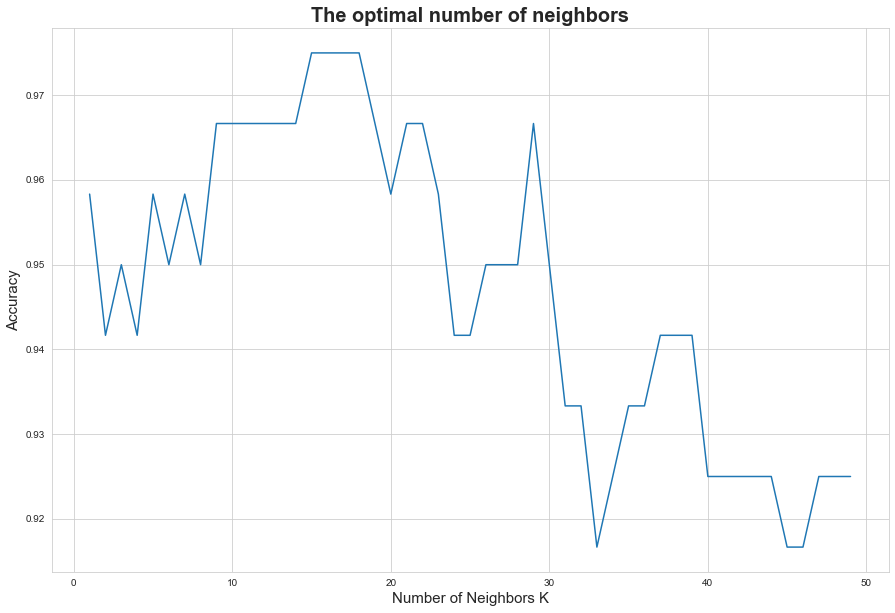

In [24]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_scores)

plt.show()

## [K-Means](https://www.youtube.com/watch?v=LFGLcgeew5A&ab_channel=PyInvest)
屬於非監督式學習演算法，主要應用於分類，我們不會知道答案是什麼！
- 決定 K 值
- 隨機給定 K 個 中心點(初始化，不一定要是資料的點)
- 計算每個樣本與各中心點的距離，並分配到不同的區域
- 重新計算新的中心點到各樣本的距離，再度更新區域
- 直到中心點不再變動

假設 K=2，然後我們隨機給兩個點，接著我們來計算每個樣本與各中心點的距離，並分配到不同區域

兩個點可以簡單用分割線來看最快

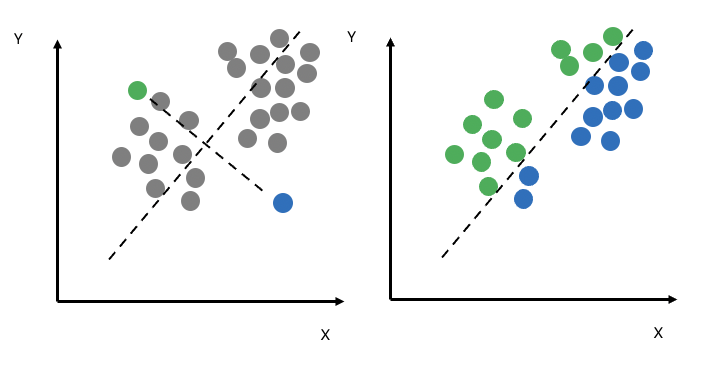

再度更新新的中心點，重新計算各中心點的距離，並更新區域

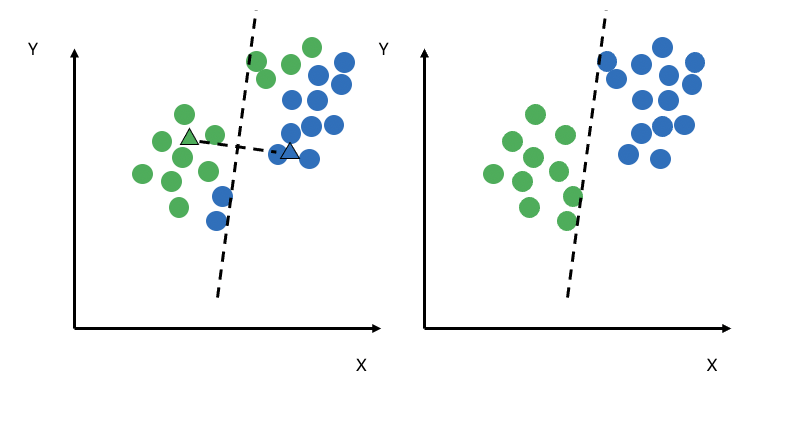

最後達到收斂(若再繼續分下去，中心點都會是一樣的)

注意： K-Means 不適合用於非數值型資料

In [25]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
x = iris_df.drop(['target', 'target_name'], axis=1).values

In [57]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

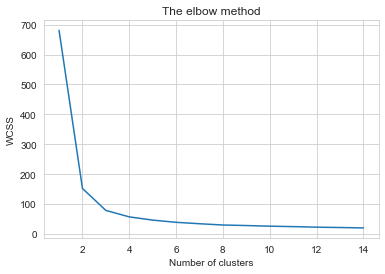

In [58]:
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

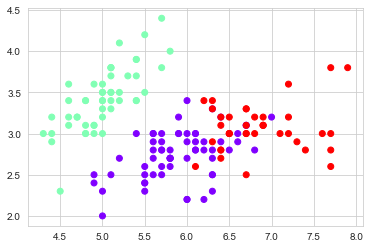

In [60]:
# Kmeans 的預測
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='rainbow')

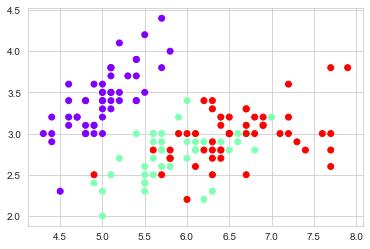

In [72]:
# 原始數據的分類
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df.target, cmap='rainbow')

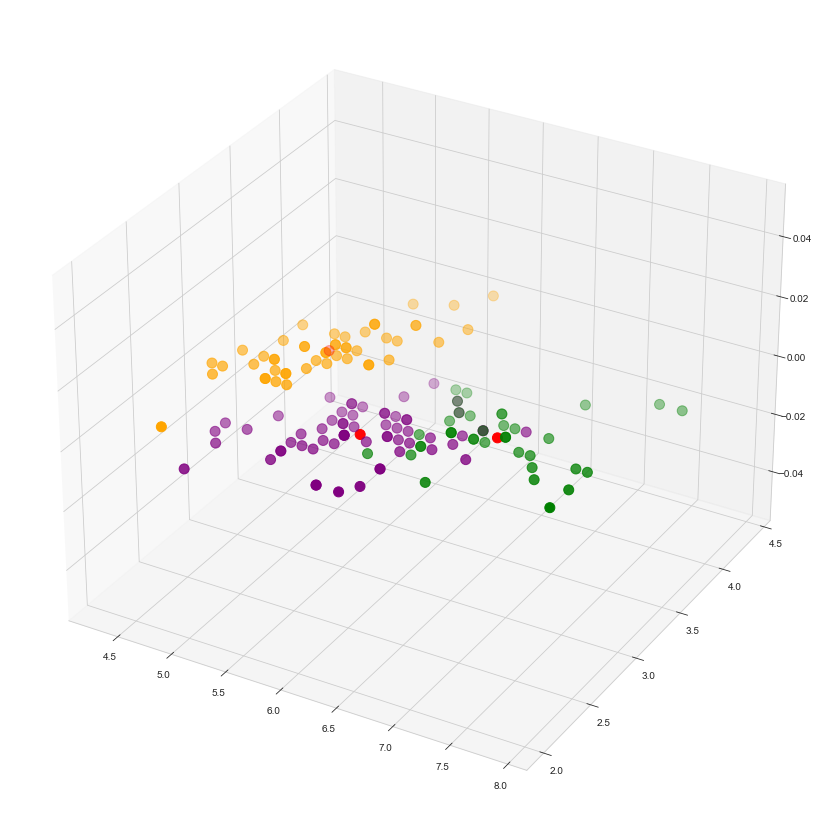

In [36]:
# 3D scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [77]:
fix_iris_label = iris_df['target'].map({0:1, 1:0, 2:2}).values
fix_iris_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(fix_iris_label, y_kmeans)
cm

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]])

In [80]:
from sklearn.metrics import classification_report
print(classification_report(fix_iris_label, y_kmeans))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

